<a href="https://colab.research.google.com/github/i2z1/Offzone_workshop/blob/main/OFFZONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Загружаем данные для воркшопа**

In [3]:
!wget https://raw.githubusercontent.com/SadrikA78/offzone/main/data/dataset.csv

--2023-08-24 14:50:55--  https://raw.githubusercontent.com/SadrikA78/offzone/main/data/dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 568968 (556K) [text/plain]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>] 555.63K  --.-KB/s    in 0.01s   

2023-08-24 14:50:55 (37.4 MB/s) - ‘dataset.csv’ saved [568968/568968]



**Прочитаем данные (CSV-DataFrame)**

In [4]:
import pandas as pd
df = pd.read_csv('/content/dataset.csv')

**Проверим корректность**

In [ ]:
df

,Unnamed: 0,UtcTime,ProcessId,EventID,User,Image,ImageLoaded,CommandLine,ParentImage,ParentCommandLine,DestinationPort,Protocol,QueryName,TargetFilename,TargetObject
0,0,2020-05-12 15:05:19.447,5380,7,NaN,C:\Windows\explorer.exe,C:\Windows\System32\Windows.System.Launcher.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-05-12 15:05:19.493,5380,11,NaN,C:\Windows\Explorer.EXE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\anon\AppData\Roaming\Microsoft\Window...,NaN
2,2,2020-05-12 15:05:19.337,5080,11,NaN,C:\Windows\system32\mmc.exe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C:\Users\anon\Desktop\xmlEvents2.xml,NaN
3,3,2020-05-12 15:05:17.066,1520,3,DESKTOP-TATBGQH\anon,C:\Windows\System32\WindowsPowerShell\v1.0\pow...,NaN,NaN,NaN,NaN,8080.0,tcp,NaN,NaN,NaN
4,4,2020-05-12 15:05:13.770,4,3,NT AUTHORITY\SYSTEM,System,NaN,NaN,NaN,NaN,137.0,udp,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3707,3767,2020-05-12 14:53:16.220,7544,7,NaN,C:\Windows\System32\RuntimeBroker.exe,C:\Windows\System32\mssprxy.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3708,3768,2020-05-12 14:53:16.201,5264,1,NT AUTHORITY\SYSTEM,C:\Windows\System32\svchost.exe,NaN,C:\Windows\system32\svchost.exe -k wsappx -p -...,C:\Windows\System32\services.exe,C:\Windows\system32\services.exe,NaN,NaN,NaN,NaN,NaN
3709,3769,2020-05-12 14:53:16.141,7544,7,NaN,C:\Windows\System32\RuntimeBroker.exe,C:\Windows\System32\Windows.StateRepositoryPS.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3710,3770,2020-05-12 14:53:16.126,7544,7,NaN,C:\Windows\System32\RuntimeBroker.exe,C:\Windows\System32\OneCoreUAPCommonProxyStub.dll,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Предварительный просмотр**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3712 entries, 0 to 3711
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3712 non-null   int64  
 1   UtcTime            3712 non-null   object 
 2   ProcessId          3712 non-null   int64  
 3   EventID            3712 non-null   int64  
 4   User               331 non-null    object 
 5   Image              3712 non-null   object 
 6   ImageLoaded        3110 non-null   object 
 7   CommandLine        60 non-null     object 
 8   ParentImage        60 non-null     object 
 9   ParentCommandLine  60 non-null     object 
 10  DestinationPort    271 non-null    float64
 11  Protocol           271 non-null    object 
 12  QueryName          104 non-null    object 
 13  TargetFilename     157 non-null    object 
 14  TargetObject       10 non-null     object 
dtypes: float64(1), int64(3), object(11)
memory usage: 435.1+ KB


In [ ]:
len(df.ProcessId.value_counts().index)

93

In [ ]:
len(df.ProcessId.value_counts()[df.ProcessId.value_counts() > 5].index)

79

In [ ]:
df.ProcessId.value_counts()[0:10]

1520     284
9716     168
9116     163
3748     114
10116    110
9308     107
4556      97
1532      90
4752      90
7584      89
Name: ProcessId, dtype: int64

**Предобработка**

In [ ]:
newdf = df[~df.ProcessId.isna()]
newdf.drop(newdf[newdf.EventID == '5'].index, inplace=True)

1. Исходники и пути

In [ ]:
newdf['binary'] = newdf.Image.str.split(r'\\').apply(lambda x: x[-1].lower())
newdf['binary'].unique()

array(['explorer.exe', 'mmc.exe', 'powershell.exe', 'system',
       'sysmon.exe', 'fsatps.exe', 'searchui.exe',
       'startmenuexperiencehost.exe', 'svchost.exe', 'fsatpn.exe',
       'fshoster32.exe', 'calculator.exe', 'backgroundtaskhost.exe',
       'fsorsp64.exe', 'runtimebroker.exe', 'dllhost.exe',
       'applicationframehost.exe', 'notepad.exe', 'wmiprvse.exe',
       'netstat.exe', 'tiworker.exe', 'trustedinstaller.exe',
       'services.exe', 'conhost.exe', 'wmiapsrv.exe', 'taskhostw.exe',
       'wsqmcons.exe', 'microsoftedge.exe', 'localbridge.exe',
       'microsoftedgecp.exe', 'microsoftedgesh.exe', 'browser_broker.exe',
       'katz.exe', 'schtasks.exe', 'fshoster64.exe', 'fodhelper.exe',
       'consent.exe', 'whoami.exe', 'systeminfo.exe', 'smartscreen.exe',
       'wscript.exe', 'searchfilterhost.exe'], dtype=object)

In [ ]:
newdf['path'] = newdf.Image.str.split(r'\\').apply(lambda x: '\\'.join(x[:-1]).lower())
newdf['path'].unique()

array(['c:\\windows', 'c:\\windows\\system32',
       'c:\\windows\\system32\\windowspowershell\\v1.0', '',
       'c:\\program files (x86)\\f-secure\\psb\\ultralight\\sensor\\1585128330',
       'c:\\windows\\systemapps\\microsoft.windows.cortana_cw5n1h2txyewy',
       'c:\\windows\\systemapps\\microsoft.windows.startmenuexperiencehost_cw5n1h2txyewy',
       'c:\\program files (x86)\\f-secure\\psb',
       'c:\\program files\\windowsapps\\microsoft.windowscalculator_10.1910.0.0_x64__8wekyb3d8bbwe',
       'c:\\program files (x86)\\f-secure\\psb\\ultralight\\ulcore\\1585820217',
       'c:\\windows\\system32\\wbem',
       'c:\\windows\\winsxs\\amd64_microsoft-windows-servicingstack_31bf3856ad364e35_10.0.18362.772_none_5f13f94c58ff41d3',
       'c:\\windows\\servicing',
       'c:\\windows\\systemapps\\microsoft.microsoftedge_8wekyb3d8bbwe',
       'c:\\program files\\windowsapps\\microsoft.microsoftofficehub_18.2002.1101.0_x64__8wekyb3d8bbwe',
       'c:\\windows\\system32\\katz'], dt

2. Аргументы cmd


In [ ]:
newdf['arguments'] = newdf.CommandLine.fillna('empty').str.split().apply(lambda x: ' '.join(x[1:]))
newdf['arguments'].unique()

array(['', '-k wsappx -p -s AppXSvc',
       '-ServerName:CortanaUI.AppXy7vb4pc2dr3kc93kfc509b1d0arkfb2x.mca',
       '-Embedding', '/Processid:{AB8902B4-09CA-4BB6-B78D-A8F59079A8D5}',
       'Files\\WindowsApps\\Microsoft.WindowsCalculator_10.1910.0.0_x64__8wekyb3d8bbwe\\Calculator.exe" -ServerName:App.AppXsm3pg4n7er43kdh1qp4e79f1j7am68r8.mca',
       '-k BcastDVRUserService -s BcastDVRUserService', '-ano',
       '0xffffffff -ForceV1',
       '-noninteractive -Sta -encodedCommand CgAgACAAIAAgACAAIAAgACAAIAAgACAAIABBAGQAZAAtAFQAeQBwAGUAIAAtAEEAcwBzAGUAbQBiAGwAeQAgAFAAcgBlAHMAZQBuAHQAYQB0AGkAbwBuAEMAbwByAGUACgAgACAAIAAgACAAIAAgACAAIAAgACAAIABbAFcAaQBuAGQAbwB3AHMALgBDAGwAaQBwAGIAbwBhAHIAZABdADoAOgBHAGUAdABUAGUAeAB0ACgAKQAgAC0AcgBlAHAAbABhAGMAZQAgACIAYAByACIALAAgACcAJwAgAC0AcwBwAGwAaQB0ACAAIgBgAG4AIgAgACAACgAgACAAIAAgACAAIAAgACAA -inputFormat xml -outputFormat xml',
       '-secured -Embedding', '-k netsvcs -p -s wlidsvc',
       '-k WerSvcGroup',
       '-k LocalSystemNetworkRestricted 

3. base64?


In [ ]:
import re
b64_regex = r"[a-zA-Z0-9+\/]{64,}={0,2}"

In [ ]:
newdf['arguments'][newdf['arguments'].str.contains('enc')]

873     -noninteractive -Sta -encodedCommand CgAgACAAI...
2564    -NoP -NonI -W Hidden -enc SQBmACgAJABQAFMAVgBF...
2728    -NoP -NonI -W Hidden -c $x=$((gp HKCU:Software...
3351    -noP -sta -w 1 -enc SQBmACgAJABQAFMAVgBlAHIAUw...
Name: arguments, dtype: object

In [ ]:
for i in newdf['arguments'][newdf['arguments'].apply(lambda x: re.search(b64_regex, x)).notnull()]:
    print(i,"\n")

-noninteractive -Sta -encodedCommand CgAgACAAIAAgACAAIAAgACAAIAAgACAAIABBAGQAZAAtAFQAeQBwAGUAIAAtAEEAcwBzAGUAbQBiAGwAeQAgAFAAcgBlAHMAZQBuAHQAYQB0AGkAbwBuAEMAbwByAGUACgAgACAAIAAgACAAIAAgACAAIAAgACAAIABbAFcAaQBuAGQAbwB3AHMALgBDAGwAaQBwAGIAbwBhAHIAZABdADoAOgBHAGUAdABUAGUAeAB0ACgAKQAgAC0AcgBlAHAAbABhAGMAZQAgACIAYAByACIALAAgACcAJwAgAC0AcwBwAGwAaQB0ACAAIgBgAG4AIgAgACAACgAgACAAIAAgACAAIAAgACAA -inputFormat xml -outputFormat xml 

-NoP -NonI -W Hidden -enc SQBmACgAJABQAFMAVgBFAFIAcwBJAE8ATgBUAGEAQgBsAGUALgBQAFMAVgBlAFIAcwBpAG8AbgAuAE0AQQBqAE8AUgAgAC0AZwBlACAAMwApAHsAJABHAFAARgA9AFsAUgBFAGYAXQAuAEEAcwBTAEUAbQBCAEwAeQAuAEcARQBUAFQAeQBwAGUAKAAnAFMAeQBzAHQAZQBtAC4ATQBhAG4AYQBnAGUAbQBlAG4AdAAuAEEAdQB0AG8AbQBhAHQAaQBvAG4ALgBVAHQAaQBsAHMAJwApAC4AIgBHAEUAVABGAGkARQBgAEwAZAAiACgAJwBjAGEAYwBoAGUAZABHAHIAbwB1AHAAUABvAGwAaQBjAHkAUwBlAHQAdABpAG4AZwBzACcALAAnAE4AJwArACcAbwBuAFAAdQBiAGwAaQBjACwAUwB0AGEAdABpAGMAJwApADsASQBmACgAJABHAFAARgApAHsAJABHAFAAQwA9ACQARwBQAEYALgBHAEUAdABWAEEATAB1AGUAKAAkAG4AVQBMAGwAKQA

In [ ]:
b64s = newdf['arguments'].apply(lambda x: re.search(b64_regex, x)).notnull()
newdf['b64'] = b64s.astype(int)

4. URL / UNC

In [ ]:
unc_regex = r"\\\\[a-zA-Z0-9]+\\[a-zA-Z0-9\\]+\."
uncs = newdf['arguments'][newdf['arguments'].apply(lambda x: re.search(unc_regex, x)).notnull()]
uncs[uncs].index

Int64Index([], dtype='int64')

In [ ]:
test = r"rundll \\test\test\r.dll"
re.search(unc_regex, test)

<re.Match object; span=(7, 21), match='\\\\test\\test\\r.'>

In [ ]:
url_regex = r"https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)"
urls = newdf['arguments'].apply(lambda x: re.search(url_regex, x)).notnull()
urls[urls]

3507    True
Name: arguments, dtype: bool

In [ ]:
newdf['arguments'][3507]

'-IOAVHost 2781761e-28e0-4109-99fe-b9d127c57afe|C:\\Users\\anon\\Downloads\\quarterly_results.docm.vbs|http://192.168.124.135/quarterly_results.docm.vbs'

In [ ]:
newdf['unc_url'] = pd.concat([uncs, urls]).astype(int)

In [ ]:
newdf[newdf['unc_url'].astype(bool)]

,Unnamed: 0,UtcTime,ProcessId,EventID,User,Image,ImageLoaded,CommandLine,ParentImage,ParentCommandLine,DestinationPort,Protocol,QueryName,TargetFilename,TargetObject,binary,path,arguments,b64,unc_url
3507,3567,2020-05-12 14:53:21.922,9444,1,DESKTOP-TATBGQH\anon,C:\Windows\System32\browser_broker.exe,NaN,C:\Windows\system32\browser_broker.exe -IOAVHo...,C:\Windows\System32\browser_broker.exe,C:\Windows\system32\browser_broker.exe -Embedding,NaN,NaN,NaN,NaN,NaN,browser_broker.exe,c:\windows\system32,-IOAVHost 2781761e-28e0-4109-99fe-b9d127c57afe...,0,1


5.  Сетевые обращения?

In [ ]:
newdf['network'] = newdf['Protocol'].notnull().astype(int)


**Объединяем в новый DataFrame**

In [ ]:
newdf = newdf[['ProcessId','binary','EventID','path', 'unc_url', 'b64', 'network']]
newdf['EventID'] = newdf['EventID'].astype('int8')
newdf.head()

<ipython-input-74-c370b2c67227>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['EventID'] = newdf['EventID'].astype('int8')


,ProcessId,binary,EventID,path,unc_url,b64,network
0,5380,explorer.exe,7,c:\windows,0,0,0
1,5380,explorer.exe,11,c:\windows,0,0,0
2,5080,mmc.exe,11,c:\windows\system32,0,0,0
3,1520,powershell.exe,3,c:\windows\system32\windowspowershell\v1.0,0,0,1
4,4,system,3,,0,0,1


In [ ]:
newdf.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3712 entries, 0 to 3711
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProcessId  3712 non-null   int64 
 1   binary     3712 non-null   object
 2   EventID    3712 non-null   int8  
 3   path       3712 non-null   object
 4   unc_url    3712 non-null   int64 
 5   b64        3712 non-null   int64 
 6   network    3712 non-null   int64 
dtypes: int64(4), int8(1), object(2)
memory usage: 335.7+ KB


Сплит выборки

*проверочные данные*

In [ ]:
valid_lst = [10608, 10804, 10856, 10904, 11044, 11148, 11232, 1164, 1456, 1460, 1532, 1552, 1908, 1932, 1936, 2156, 2316, 2520, 2524, 2660, 2720, 2724, 2892, 2920, 2952, 3016, 3036, 3244, 3748, 3792, 4, 440, 4752, 4836, 5080, 5152, 5264, 5380, 5664, 5800, 5832, 6016, 6192, 6656, 672, 6796, 6808, 684, 6928, 7092, 7236, 7352, 7544, 7584, 7692, 7724, 7968, 8024, 8048, 8096, 8344, 8452, 8636, 8704, 8740, 8840, 8972, 9092, 9160, 9308, 9716, 9728, 9992]

In [ ]:
mal_lst = [10116, 10280, 11160, 1396, 1520, 1580, 2204, 2268, 3268, 4068, 4556, 6432, 7644, 8216, 8256, 9116, 9344, 9444, 9636, 976]

Импорт модулей

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from datetime import datetime
import numpy as np

Дополнительная функция

In [ ]:
MAX_TIMESTEPS = 128
# number of features (except PID itself)
N = len(newdf.columns) - 1

def groupby_transform(dataframe, column):
    global MAX_TIMESTEPS, N
    total = len(dataframe.groupby(column))
    start = datetime.now()
    print(f"Старт: {start}")

    print(f"Всего категорий '{column}': '{total}'")
    print(f"Уникальные значения: {dataframe[column].nunique()}")

    X = np.empty(shape=(0, MAX_TIMESTEPS, N)).astype(np.int16)
    y = np.empty(shape=(0,1)).astype(np.int16)

    binary_le = LabelEncoder().fit(['OTHER'] + list(dataframe['binary'].unique()))
    path_le = LabelEncoder().fit(['OTHER'] + list(dataframe['path'].unique()))


    try:
        for i, (value, df) in enumerate(dataframe.groupby(column)):
            # упрощение - пропуск менее 3 событий
            if len(df) < 4:
                continue

            if value in valid_lst:
                temp_y = np.array([0]).reshape(1,1)
            elif value in mal_lst:
                temp_y = np.array([1]).reshape(1,1)
            else:
                print(f'Неклассифицируемые ProcessID: {value}')
                raise Exception

            # Create 3D array
            temp_X = np.hstack((
                df[['EventID', 'unc_url', 'b64', 'network']].to_numpy(),
                binary_le.transform(list(df['binary'])).reshape(-1,1),
                path_le.transform(list(df['path'])).reshape(-1,1)
            ))

            # PADDING
            temp_X = pad_sequences(temp_X.T, maxlen=MAX_TIMESTEPS).T

            # adding this example to actual set
            X = np.concatenate((X, temp_X.reshape(1, MAX_TIMESTEPS, N)))
            y = np.concatenate((y, temp_y))

        end = datetime.now()
        print(f"Конец: {end}")
        print(f"Время выполнения сплита: {end - start}")
        return X, y

    except KeyboardInterrupt:
        end = datetime.now()
        print(f"Закончено:\nитераций:{i}\nвремя:{end}")
        print(f"Время выполнения сплита: {end - start}")
        return X, y

    except Exception as ex:
        print(ex)
        np.save(f'X{i}.npy', X)
        np.save(f'y{i}.npy', y)

In [ ]:
X, y = groupby_transform(newdf, 'ProcessId')

Старт: 2023-08-12 11:54:12.262526
Всего категорий 'ProcessId': '93'
Уникальные значения: 93
Конец: 2023-08-12 11:54:12.533243
Время выполнения сплита: 0:00:00.270717


In [ ]:
u, c = np.unique(y, return_counts=True)
pos, neg = c
pos, neg
print(f"Аномалии: {neg}\nСработок: {pos}")
print(f"Доля аномалий: {round(neg*100/(pos+neg),4)} %")

Аномалии: 19
Сработок: 61
Доля аномалий: 23.75 %


In [ ]:
X.shape


(80, 128, 6)

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)
print(train_X.shape)
print(train_y.shape)
print(val_X.shape)
print(val_y.shape)

(64, 128, 6)
(64, 1)
(16, 128, 6)
(16, 1)


**KILLBoosts**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor
from catboost import Pool

In [ ]:
train_X_kill = train_X.reshape(train_X.shape[0], -1)
val_X_kill = val_X.reshape(val_X.shape[0], -1)

In [ ]:
model_cat = CatBoostRegressor(iterations=200, learning_rate=0.3, depth=4)

In [ ]:
model_cat.fit(train_X_kill, train_y)

0:	learn: 0.4194631	total: 12.3ms	remaining: 2.44s
1:	learn: 0.3961721	total: 21ms	remaining: 2.07s
2:	learn: 0.3735464	total: 30.7ms	remaining: 2.01s
3:	learn: 0.3541292	total: 39.6ms	remaining: 1.94s
4:	learn: 0.3422443	total: 50.2ms	remaining: 1.96s
5:	learn: 0.3379724	total: 58.8ms	remaining: 1.9s
6:	learn: 0.3309836	total: 68.2ms	remaining: 1.88s
7:	learn: 0.3279592	total: 77.8ms	remaining: 1.87s
8:	learn: 0.3184169	total: 85.2ms	remaining: 1.81s
9:	learn: 0.3100820	total: 94.5ms	remaining: 1.79s
10:	learn: 0.2836136	total: 105ms	remaining: 1.8s
11:	learn: 0.2800812	total: 115ms	remaining: 1.8s
12:	learn: 0.2678919	total: 123ms	remaining: 1.77s
13:	learn: 0.2553398	total: 131ms	remaining: 1.74s
14:	learn: 0.2441447	total: 141ms	remaining: 1.74s
15:	learn: 0.2355910	total: 151ms	remaining: 1.74s
16:	learn: 0.2336340	total: 161ms	remaining: 1.73s
17:	learn: 0.2164113	total: 174ms	remaining: 1.76s
18:	learn: 0.2087067	total: 183ms	remaining: 1.74s
19:	learn: 0.2064350	total: 193ms	re

In [ ]:
preds_model_cat=model_cat.predict(val_X_kill)

In [ ]:
from sklearn.metrics import confusion_matrix
score_cat=np.round(np.clip(preds_model_cat, 0,1)).astype('int')
mt_cat = confusion_matrix(val_y.astype('int'), score_cat)
mt_cat

array([[12,  3],
       [ 1,  0]])

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(val_y.astype('int'), score_cat)


In [ ]:
from sklearn.metrics import classification_report
target_names = ['Безопасное событие', 'Вредоносное событие']
print(classification_report(score_cat, val_y.astype('int'), target_names=target_names))

                     precision    recall  f1-score   support

 Безопасное событие       0.80      0.92      0.86        13
Вредоносное событие       0.00      0.00      0.00         3

           accuracy                           0.75        16
          macro avg       0.40      0.46      0.43        16
       weighted avg       0.65      0.75      0.70        16



**Нейронные сети**

In [ ]:
import tensorflow as tf
from tensorflow import keras

BATCH_SIZE = 8
SHUFFLE_BUFFER = 100

train_Xds = tf.data.Dataset.from_tensor_slices((train_X, train_y)).\
                    shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE).prefetch(1)
val_Xds = tf.data.Dataset.from_tensor_slices((val_X, val_y)).\
                    shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE).prefetch(1)

Иницилизация архитектур

In [ ]:
def model_simplest(MAX_TIMESTEPS, OH_DIMENSION):
    model_simplest = keras.models.Sequential([
    keras.layers.LSTM(32, dropout=0.2, recurrent_dropout=0.2, input_shape=[MAX_TIMESTEPS, OH_DIMENSION]),
    keras.layers.Dense(units=1, activation='sigmoid')
    ])
    return model_simplest


def model_deep(MAX_TIMESTEPS, OH_DIMENSION):
    model = keras.models.Sequential([
    keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=[MAX_TIMESTEPS, OH_DIMENSION]),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


def model_deeper(MAX_TIMESTEPS, OH_DIMENSION):
    model = keras.models.Sequential([
    keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2,
                      input_shape=[MAX_TIMESTEPS, OH_DIMENSION], return_sequences=True),
    keras.layers.LSTM(128, dropout=0.2, recurrent_dropout=0.2, input_shape=[MAX_TIMESTEPS, OH_DIMENSION]),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    #keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    ])
    return model




def model_conv_rnn(MAX_TIMESTEPS, OH_DIMENSION):
    model = keras.models.Sequential([
                keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu',
                                    input_shape=[MAX_TIMESTEPS, OH_DIMENSION]),
                keras.layers.MaxPooling1D(pool_size=2),
                keras.layers.LSTM(64),
                keras.layers.Dropout(0.5),
                keras.layers.Dense(32, activation='relu'),
                keras.layers.Dense(1, activation='sigmoid')
    ])
    return model


In [ ]:
models = { 'simplest': model_simplest(MAX_TIMESTEPS, N),
  'deep': model_deep(MAX_TIMESTEPS, N),
  'deeper': model_deeper(MAX_TIMESTEPS, N),
  'conv1d': model_conv_rnn(MAX_TIMESTEPS, N)}

Покажем архитектуры

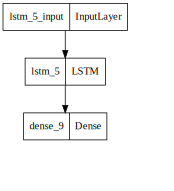

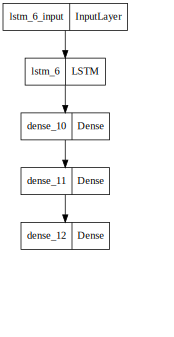

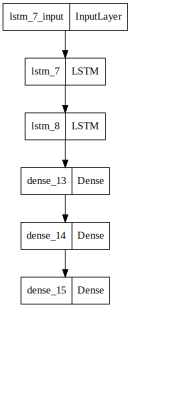

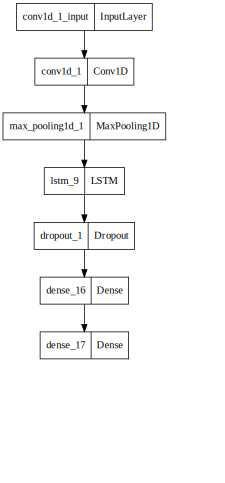

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
for i in models.values():
  display (SVG(model_to_dot(i).create(prog='dot', format='svg')))

Функция отображения обучения

In [ ]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

def plot_loss(epochs, history, label='', n=1, val=False):
    plt.semilogy(epochs,  history['loss'],
               color=colors[n], label='Train '+label)
    if val:
      plt.semilogy(epochs,  history['val_loss'],
            color=colors[n], label='Val '+label,
            linestyle="--")
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    plt.legend()

**МЕТРИКИ**

In [ ]:
from sklearn.metrics import f1_score

METRICS = [
    keras.metrics.TruePositives(name='tp'),
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.TrueNegatives(name='tn'),
    keras.metrics.FalseNegatives(name='fn'),
    # Precision: (TP) / (TP + FP)
    keras.metrics.Precision(name='precision'),
    # Recall: (TP) / (TP+FN)
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
    keras.metrics.Accuracy(name='accuracy')
    ]

**Пример обучения**

In [ ]:
model = models['simplest']
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=METRICS)
model.fit(train_Xds, epochs=3, verbose=1)

Epoch 1/3
8/8 [==============================] - 7s 127ms/step - loss: 0.8745 - tp: 16.0000 - fp: 41.0000 - tn: 5.0000 - fn: 2.0000 - precision: 0.2807 - recall: 0.8889 - auc: 0.5815 - accuracy: 0.0000e+00
Epoch 2/3
8/8 [==============================] - 1s 139ms/step - loss: 0.7533 - tp: 14.0000 - fp: 34.0000 - tn: 12.0000 - fn: 4.0000 - precision: 0.2917 - recall: 0.7778 - auc: 0.5821 - accuracy: 0.0000e+00
Epoch 3/3
8/8 [==============================] - 1s 138ms/step - loss: 0.6709 - tp: 11.0000 - fp: 22.0000 - tn: 24.0000 - fn: 7.0000 - precision: 0.3333 - recall: 0.6111 - auc: 0.6528 - accuracy: 0.0000e+00


In [ ]:
model.evaluate(val_Xds)


2/2 [==============================] - 1s 35ms/step - loss: 0.6320 - tp: 0.0000e+00 - fp: 5.0000 - tn: 10.0000 - fn: 1.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4000 - accuracy: 0.0000e+00  


[0.631989061832428, 0.0, 5.0, 10.0, 1.0, 0.0, 0.0, 0.3999999761581421, 0.0]

**Выбор лучшей модели**


0th model: simplest!
8/8 [==============================] - 1s 19ms/step - loss: 0.5295 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 46.0000 - fn: 18.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7615 - accuracy: 0.0000e+00
loss :  0.5294629335403442
tp :  0.0
fp :  0.0
tn :  46.0
fn :  18.0
precision :  0.0
recall :  0.0
auc :  0.7614734172821045
accuracy :  0.0


1th model: deep!
8/8 [==============================] - 2s 64ms/step - loss: 0.5386 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 46.0000 - fn: 18.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7500 - accuracy: 0.0000e+00
loss :  0.5385873913764954
tp :  0.0
fp :  0.0
tn :  46.0
fn :  18.0
precision :  0.0
recall :  0.0
auc :  0.75
accuracy :  0.0


2th model: deeper!
8/8 [==============================] - 2s 77ms/step - loss: 0.5205 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 46.0000 - fn: 18.0000 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.7772 - accuracy: 0.0000e+00
loss :  0.520524799823761
tp :  0.0

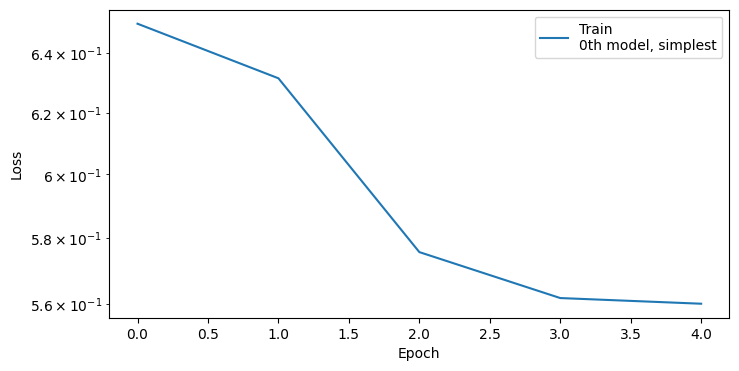

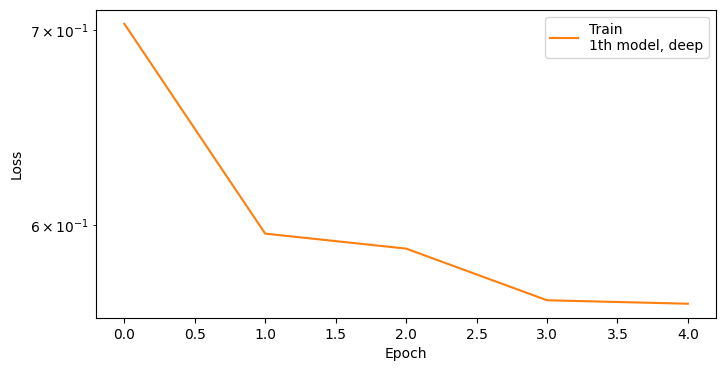

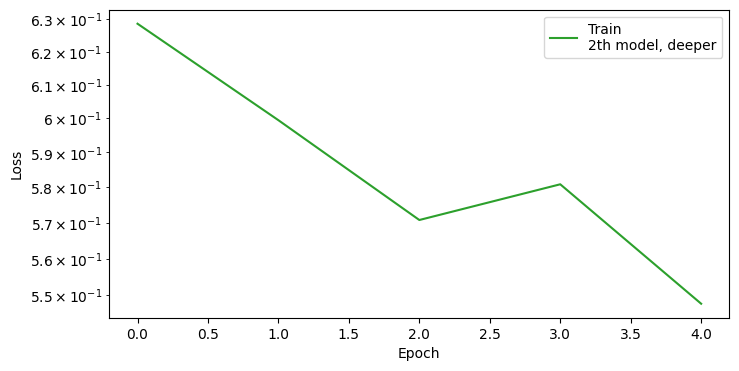

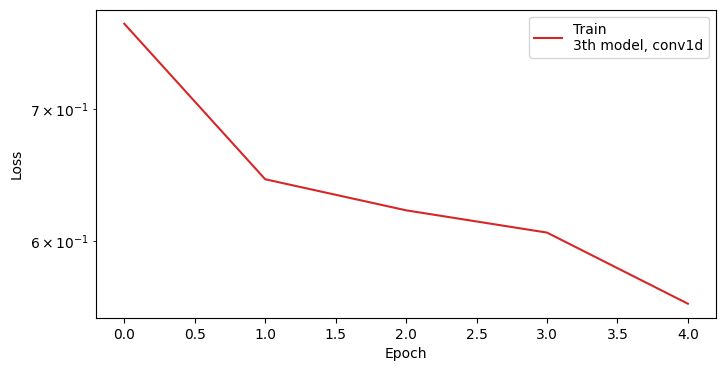

In [ ]:
for i, (name, model) in enumerate(models.items()):
  print(f"\n{i}th model: {name}!")
  if name == 'bidirectional':
    continue
  OPT = keras.optimizers.Adam()
  model.compile(optimizer=OPT, loss='binary_crossentropy', metrics=METRICS)

  h = model.fit(train_Xds, epochs=5, verbose=0)
  plt.figure(figsize=[8, 4])
  plot_loss(h.epoch, h.history, f"\n{i}th model, {name}", i)

  results = model.evaluate(train_Xds)

  for name, value in zip(model.metrics_names, results):
    print(name, ': ', value)
  print()

**Сохраним лучшую модель**

In [ ]:
from google.colab import files # для скачивания и загрузок файлов
model_json = model.to_json()
with open("model.json","w") as json_file:
     json_file.write(model_json)
files.download('model.json')
model.save('weights.h5')
files.download('weights.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>